In [1085]:
import glob
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.graph_objects as go
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1130]:
model_to_index = {
    ####
    # NLP
    ####
    # Commercial
    "gpt-4": 0,
    "command-r": 1,
    # English
    "Mistral-7B-Instruct-v0.2": 2,
    "Meta-Llama-3-8B-Instruct": 3,
    "falcon-7b-instruct": 4,
    # Multilingual
    # "Qwen-7B-Chat": 5,
    "mt0-xl": 6,
    "bloomz-7b1": 7,
    "bactrian-x-llama-7b-merged": 8,
    "aya-23-8B": 9,
    "aya-101": 10,
    # SEA
    "sea-lion-7b-instruct-research": 11,
    "SeaLLM-7B-v2.5": 12,
    "Sailor-7B-Chat": 13,
    # SEA country-specific
    "cendol-mt5-xl": 14,
    "cendol-llama2-7b": 15,
    "Merak-7B-v4": 16,
    "LLaMa3-8b-WangchanX-sft-Demo": 17,
    "malaysian-llama-3-8b-instruct-16k": 18,
    ####
    # Speech
    ####
    # "wav2vec2-large-xlsr-53": 0,
    # Multilingual
    "whisper-large-v3": 1,
    "mms-1b-all": 2,
    "seamless-m4t-v2-large": 3,
    # "wav2vec2-xlsr-53-espeak-cv-ft": 4,
    # English
    "wav2vec2-large-xlsr-53-english": 13,
    # SEA country-specific
    "wav2vec2-large-xlsr-indonesian": 5,
    "wav2vec2-indonesian-javanese-sundanese": 4,
    "whisper-large-id": 6,
    # "wav2vec2-large-vi-vlsp2020": 9,
    "wav2vec2-large-xlsr-53-th-cv8-newmm": 7,
    "whisper-th-large-v3-combined": 8,
    "wav2vec2-bloom-speech-tgl": 9,
    "wav2vec2-bloom-speech-mya": 10,
    "wav2vec2-xls-r-300m-khmer": 11,
    "whisper-large-khmer-asr": 12,
    ####
    # VL
    ####
    "mblip-mt0-xl": 0,
    "paligemma-3b-mix-224": 1,
    "instructblip-vicuna-7b": 2,
    "llava-1.5-7b-hf": 3,
    "llava-v1.6-mistral-7b-hf": 4,
    "idefics2-8b": 5,
}

model_to_group = {
    ####
    # NLP
    ####
    # Commercial
    "gpt-4": 'Commercial',
    "command-r": 'Commercial',
    # English
    "Mistral-7B-Instruct-v0.2": 'English',
    "Meta-Llama-3-8B-Instruct": 'English',
    "falcon-7b-instruct": 'English',
    # Multilingual
    "Qwen-7B-Chat": 'Multilingual',
    "mt0-xl": 'Multilingual',
    "bloomz-7b1": 'Multilingual',
    "bactrian-x-llama-7b-merged": 'Multilingual',
    "aya-23-8B": 'Multilingual',
    "aya-101": 'Multilingual',
    # SEA
    "sea-lion-7b-instruct-research": 'SEA',
    "SeaLLM-7B-v2.5": 'SEA',
    "Sailor-7B-Chat": 'SEA',
    # SEA country-specific
    "cendol-mt5-xl": 'SEA-country',
    "cendol-llama2-7b": 'SEA-country',
    "Merak-7B-v4": 'SEA-country',
    "LLaMa3-8b-WangchanX-sft-Demo": 'SEA-country',
    "malaysian-llama-3-8b-instruct-16k": 'SEA-country',
    ####
    # Speech
    ####
    # Multilingual
    "wav2vec2-large-xlsr-53": "Pre-trained",
    "wav2vec2-xlsr-53-espeak-cv-ft": "Multilingual",
    "whisper-large-v3": "Multilingual",
    "mms-1b-all": "Multilingual",
    "seamless-m4t-v2-large": "Multilingual",
    # English
    "wav2vec2-large-xlsr-53-english": "English",
    # SEA country-specific
    "wav2vec2-large-xlsr-indonesian": "SEA-country",
    "wav2vec2-indonesian-javanese-sundanese": "SEA-country",
    "whisper-large-id": "SEA-country",
    "wav2vec2-large-vi-vlsp2020": "SEA-country",
    "wav2vec2-large-xlsr-53-th-cv8-newmm": "SEA-country",
    "whisper-th-large-v3-combined": "SEA-country",
    "wav2vec2-bloom-speech-tgl": "SEA-country",
    "wav2vec2-bloom-speech-mya": "SEA-country",
    "wav2vec2-xls-r-300m-khmer": "SEA-country",
    "whisper-large-khmer-asr": "SEA-country",
}

model_to_display_name = {
    ####
    # NLP
    ####
    # Commercial
    "gpt-4": "GPT-4",
    "command-r": "Command R",
    # English
    "Mistral-7B-Instruct-v0.2": "Mistral 7B",
    "Meta-Llama-3-8B-Instruct": "Llama3 8B",
    "falcon-7b-instruct": "Falcon 7B",
    # Multilingual
    "Qwen-7B-Chat": "Qwen 7B",
    "mt0-xl": "mT0 XL",
    "bloomz-7b1": "BLOOMZ 7B",
    "bactrian-x-llama-7b-merged": "BactrianX-\nLlama3 7B",
    "aya-23-8B": "AYA-23 8B",
    "aya-101": "AYA-101 13B",
    # SEA
    "sea-lion-7b-instruct-research": "SEA-LION 7B",
    "SeaLLM-7B-v2.5": "SeaLLM\nv2.5 7B",
    "Sailor-7B-Chat": "Sailor 7B",
    # SEA country-specific
    "cendol-mt5-xl": "Cendol-\nmT5 XL",
    "cendol-llama2-7b": "Cendol-\nLlama2 7B",
    "Merak-7B-v4": "Merak v4 7B",
    "LLaMa3-8b-WangchanX-sft-Demo": "WangchanX-\nLlama3 8B",
    "malaysian-llama-3-8b-instruct-16k": "Malaysian\nLlama3 8B",
    ####
    # Speech
    ####
    # Multilingual
    "wav2vec2-large-xlsr-53": "XLSR\nPre-trained",
    "wav2vec2-xlsr-53-espeak-cv-ft": "XLSR\nMultilingual",
    "whisper-large-v3": "Whisper V3",
    "mms-1b-all": "MMS 1B",
    "seamless-m4t-v2-large": "Seamless\nM4T v2",
    # English
    "wav2vec2-large-xlsr-53-english": "XLSR\nEnglish",
    # SEA country-specific
    "wav2vec2-large-xlsr-indonesian": "XLSR\nIndonesian",
    "wav2vec2-indonesian-javanese-sundanese": "XLSR\nInd-Jav-Sun",
    "whisper-large-id": "Whisper\nIndonesian",
    "wav2vec2-large-vi-vlsp2020": "XLSR\nVietnamese",
    "wav2vec2-large-xlsr-53-th-cv8-newmm": "XLSR\nThai",
    "whisper-th-large-v3-combined": "Whisper\nThai",
    "wav2vec2-bloom-speech-tgl": "XLS-R\nTagalog",
    "wav2vec2-bloom-speech-mya": "XLS-R\nBurmese",
    "wav2vec2-xls-r-300m-khmer": "XLS-R\nKhmer",
    "whisper-large-khmer-asr": "Whisper\nKhmer",
    ####
    # VL
    ####
    "mblip-mt0-xl": "mBLIP-\nmT0 XL",
    "paligemma-3b-mix-224": "PaliGemma\n3B",
    "instructblip-vicuna-7b": "Instruct\nBLIP 7B",
    "llava-1.5-7b-hf": "LLaVA\nv1.5 7B",
    "llava-v1.6-mistral-7b-hf": "LLaVA\nv1.6 7B",
    "idefics2-8b": "Idefics2\n8B",
}

model_to_color = {
    # Commercial
    "gpt-4": "#b8b8b8",
    "command-r": "#b8b8b8",
    # English
    "Mistral-7B-Instruct-v0.2": "#d43bff",
    "Meta-Llama-3-8B-Instruct": "#d43bff",
    "falcon-7b-instruct": "#d43bff",
    # Multilingual
    "Qwen-7B-Chat": "#2693ff",
    "mt0-xl": "#2693ff",
    "bloomz-7b1": "#2693ff",
    "bactrian-x-llama-7b-merged": "#2693ff",
    "aya-23-8B": "#2693ff",
    "aya-101": "#2693ff",
    # SEA
    "sea-lion-7b-instruct-research": "#26ffc2",
    "SeaLLM-7B-v2.5": "#26ffc2",
    "Sailor-7B-Chat": "#26ffc2",
    # SEA country-specific
    "cendol-mt5-xl": "#37db4a",
    "cendol-llama2-7b": "#37db4a",
    "Merak-7B-v4": "#e3bd00",
    "LLaMa3-8b-WangchanX-sft-Demo": "#ffaf4d",
    "malaysian-llama-3-8b-instruct-16k": "#ff4d4d",
}

model_to_individual_color = {
    # Commercial
    "gpt-4": "#b8b8b8",
    "command-r": "#545454",
    # English
    "Mistral-7B-Instruct-v0.2": "#e791ff",
    "Meta-Llama-3-8B-Instruct": "#d43bff",
    "falcon-7b-instruct": "#8507a8",
    # Multilingual
    "Qwen-7B-Chat": "#a791ff",
    "mt0-xl": "#59d0ff",
    "bloomz-7b1": "#2693ff",
    "bactrian-x-llama-7b-merged": "#2660ff",
    "aya-23-8B": "#052fa3",
    "aya-101": "#052fa3",
    # SEA
    "sea-lion-7b-instruct-research": "#95dbc7",
    "SeaLLM-7B-v2.5": "#26ffc2",
    "Sailor-7B-Chat": "#059e73",
    # SEA country-specific
    "cendol-mt5-xl": "#37db4a",
    "cendol-llama2-7b": "#018210",
    "Merak-7B-v4": "#e3bd00",
    "LLaMa3-8b-WangchanX-sft-Demo": "#ffaf4d",
    "malaysian-llama-3-8b-instruct-16k": "#ff4d4d",
}

In [1024]:
subset_lang_task_df = pd.read_csv("./utils/subset_lang_task_mapping.csv")
subset_lang_task_df.head()

,dataset,lang,task,region
0,lr_sum_ind_seacrowd_t2t,ind,Summarization,Indonesia
1,lr_sum_vie_seacrowd_t2t,vie,Summarization,Vietnam
2,lr_sum_lao_seacrowd_t2t,lao,Summarization,Laos
3,lr_sum_tha_seacrowd_t2t,tha,Summarization,Thailand
4,lr_sum_khm_seacrowd_t2t,khm,Summarization,Cambodia


In [1025]:
population_df = pd.read_csv("./utils/lang_populations.csv")
population_df.head()

,lang,population
0,aaa,9000
1,aab,7000
2,aac,50
3,aad,830
4,aae,100000


In [1026]:
dfs = []
for path in glob.glob('../evaluation/metrics_nlu/*.csv'):
    model = path[:-4].split('_')[-1]
    print(model)
    if model == 'sealion7b':
        continue
    elif "vocab" in model:
        continue
        
    df = pd.read_csv(path).set_index('index')
    df['accuracy'] = df['accuracy'].astype(float) * 100
    df['macro_f1_score'] = df['macro_f1_score'].astype(float) * 100
    df['weighted_f1_score'] = df['weighted_f1_score'].astype(float) * 100
    df['model'] = model
    dfs.append(df)
df = pd.concat(dfs)
df = pd.merge(df, subset_lang_task_df, on="dataset")
df = df[df['model'] != 'Qwen-7B-Chat']
nlu_df = df.copy()

Mistral-7B-Instruct-v0.2
SeaLLM-7B-v2.5
cendol-llama2-7b
gpt-4
falcon-7b-instruct
cendol-mt5-xl
mt0-xl
Sailor-7B-Chat
sea-lion-7b-instruct-research
bactrian-x-llama-7b-merged
aya-23-8B
aya-101
LLaMa3-8b-WangchanX-sft-Demo
command-r
Merak-7B-v4
Meta-Llama-3-8B-Instruct
Qwen-7B-Chat
bloomz-7b1
malaysian-llama-3-8b-instruct-16k


In [887]:
df.shape, df.dropna().shape

((6550, 17), (6550, 17))

In [888]:
df.model.unique()

array(['Mistral-7B-Instruct-v0.2', 'SeaLLM-7B-v2.5', 'cendol-llama2-7b',
       'gpt-4', 'falcon-7b-instruct', 'cendol-mt5-xl', 'mt0-xl',
       'Sailor-7B-Chat', 'sea-lion-7b-instruct-research',
       'bactrian-x-llama-7b-merged', 'aya-23-8B', 'aya-101',
       'LLaMa3-8b-WangchanX-sft-Demo', 'command-r', 'Merak-7B-v4',
       'Meta-Llama-3-8B-Instruct', 'bloomz-7b1',
       'malaysian-llama-3-8b-instruct-16k'], dtype=object)

In [889]:
df.head()

,dataset,prompt_id,prompt_lang,accuracy,micro_prec,micro_rec,micro_f1_score,macro_prec,macro_rec,macro_f1_score,weighted_prec,weighted_rec,weighted_f1_score,model,lang,task,region
0,sib_200_bjn_Latn_seacrowd_text,0,eng,62.745098,0.627451,0.627451,0.627451,0.652461,0.635471,62.827315,0.673230,0.627451,63.726059,Mistral-7B-Instruct-v0.2,bjn,Topic Classification,Indonesia
1,sib_200_bjn_Latn_seacrowd_text,1,eng,56.862745,0.568627,0.568627,0.568627,0.669127,0.625370,58.053096,0.722767,0.568627,57.745526,Mistral-7B-Instruct-v0.2,bjn,Topic Classification,Indonesia
2,sib_200_bjn_Latn_seacrowd_text,2,eng,60.784314,0.607843,0.607843,0.607843,0.686098,0.634426,60.773059,0.719347,0.607843,61.401660,Mistral-7B-Instruct-v0.2,bjn,Topic Classification,Indonesia
3,xcopa_ind_seacrowd_qa,0,eng,51.200000,0.512000,0.512000,0.512000,0.512284,0.512000,50.916494,0.512284,0.512000,50.916494,Mistral-7B-Instruct-v0.2,ind,Cultural QA,Indonesia
4,xcopa_ind_seacrowd_qa,1,eng,52.200000,0.522000,0.522000,0.522000,0.523119,0.522000,51.614536,0.523119,0.522000,51.614536,Mistral-7B-Instruct-v0.2,ind,Cultural QA,Indonesia


### Check Per Model

In [890]:
df = df.dropna()

#### All languages

In [891]:
df[(df['prompt_lang'] == 'eng')].groupby(['model', 'prompt_lang'])[['accuracy', 'macro_f1_score', 'weighted_f1_score']].mean().sort_values(['weighted_f1_score','model'], ascending=False)

,,accuracy,macro_f1_score,weighted_f1_score
model,prompt_lang,,,
aya-101,eng,58.435294,55.185881,58.076202
command-r,eng,57.884403,45.506687,56.909308
gpt-4,eng,50.061140,42.887556,54.802268
mt0-xl,eng,51.858739,47.179116,48.994444
SeaLLM-7B-v2.5,eng,48.933357,45.258798,48.652827
Sailor-7B-Chat,eng,49.039534,45.124211,48.263794
Mistral-7B-Instruct-v0.2,eng,47.476853,43.993325,47.223760
Merak-7B-v4,eng,45.599768,40.342192,44.256475
Meta-Llama-3-8B-Instruct,eng,44.087687,41.689384,44.228354


#### Per language

In [892]:
df[(df['prompt_lang'] == 'eng') & (df['lang'] == "ind")].groupby(['model', 'lang'])[['accuracy', 'macro_f1_score', 'weighted_f1_score']].mean().sort_values(['weighted_f1_score', 'model'], ascending=False)

,,accuracy,macro_f1_score,weighted_f1_score
model,lang,,,
gpt-4,ind,56.959984,45.498609,60.684588
command-r,ind,59.102503,42.599746,58.255418
aya-101,ind,55.424091,52.790719,54.208509
SeaLLM-7B-v2.5,ind,54.548152,49.894815,53.435338
Mistral-7B-Instruct-v0.2,ind,52.743199,49.323219,52.489473
Sailor-7B-Chat,ind,52.489396,49.089509,51.317375
Meta-Llama-3-8B-Instruct,ind,49.683805,45.989318,49.193758
malaysian-llama-3-8b-instruct-16k,ind,49.786562,44.912438,48.554411
Merak-7B-v4,ind,50.737353,45.805554,48.538148


In [893]:
df.model.unique()

array(['Mistral-7B-Instruct-v0.2', 'SeaLLM-7B-v2.5', 'cendol-llama2-7b',
       'gpt-4', 'falcon-7b-instruct', 'cendol-mt5-xl', 'mt0-xl',
       'Sailor-7B-Chat', 'sea-lion-7b-instruct-research',
       'bactrian-x-llama-7b-merged', 'aya-23-8B', 'aya-101',
       'LLaMa3-8b-WangchanX-sft-Demo', 'command-r', 'Merak-7B-v4',
       'Meta-Llama-3-8B-Instruct', 'bloomz-7b1',
       'malaysian-llama-3-8b-instruct-16k'], dtype=object)

# NLU

['#b8b8b8', '#b8b8b8', '#d43bff', '#d43bff', '#d43bff', '#2693ff', '#2693ff', '#2693ff', '#2693ff', '#2693ff', '#26ffc2', '#26ffc2', '#26ffc2', '#37db4a', '#37db4a', '#e3bd00', '#ffaf4d', '#ff4d4d']


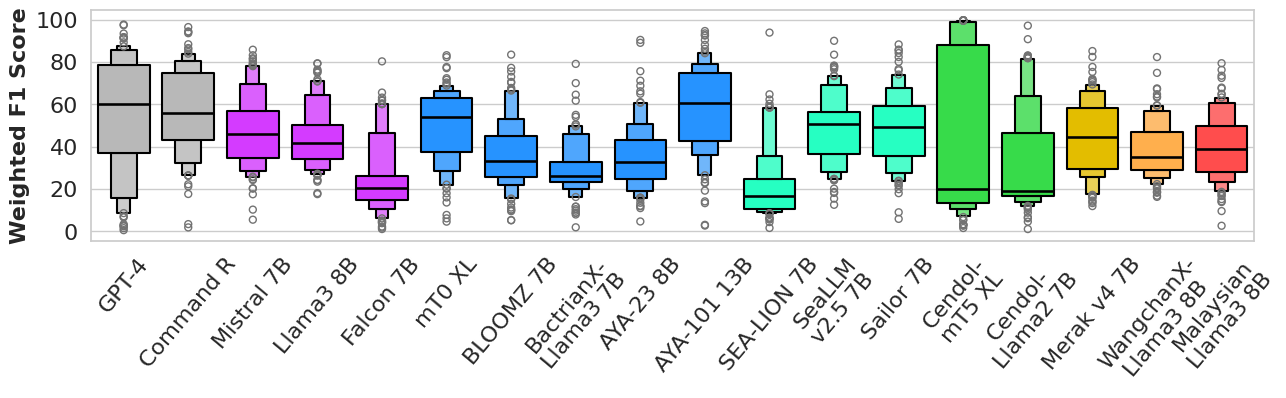

In [894]:
sns.set(rc={'figure.figsize':(15,3)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf.sort_values('model_id')

color_values = [v for k, v in model_to_color.items() if k in pdf["model"].unique()]

print(color_values)

ax = sns.boxenplot(data=(pdf), x='model_name', y='weighted_f1_score',
                   hue='model', k_depth=3, dodge=False, palette=color_values,
                   saturation=1,
                   linewidth=1.5, linecolor="#000000",
)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
# n_model = len(pdf["model_name"].unique())
# for i in range(n_model-7, n_model):
#     ax.axvspan(i-0.45,i+0.45, color='green', alpha=0.1)

ax.get_legend().set_visible(False)
plt.xticks(rotation=50, fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Weighted F1 Score', fontdict={'weight': 'bold', 'size': 16})
plt.xlabel(None)
plt.savefig('../figures/nlu/weighted_f1_score.pdf', bbox_inches='tight')
plt.show()

#### Per region

Per model.

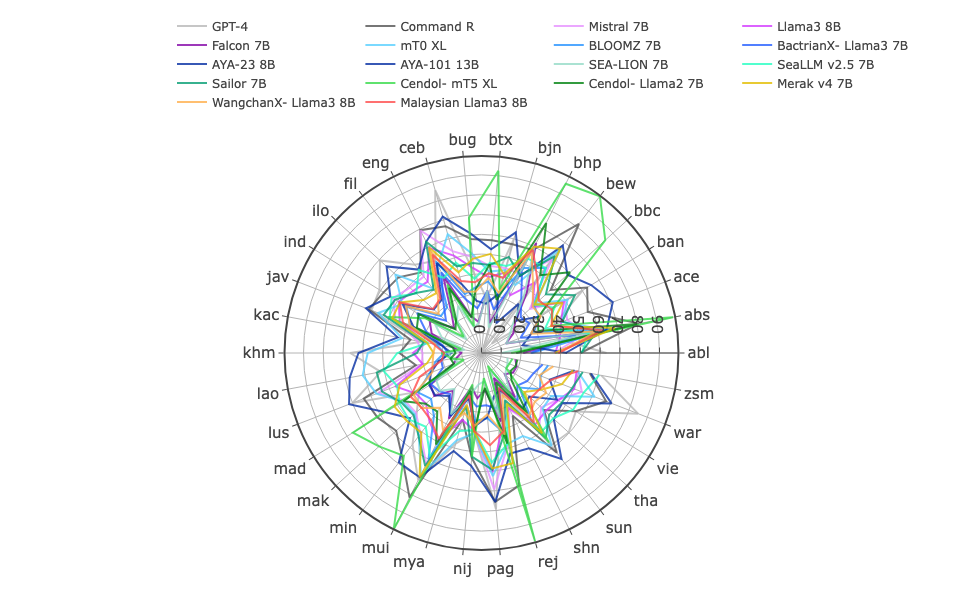

In [899]:
import plotly.express as px

fig = go.Figure()

for i, model in enumerate(model_to_index.keys()):
    if model not in df['model'].unique():
        continue
    
    pdf = df[(df['prompt_lang'] == 'eng') & (df['model'] == model)].groupby(['prompt_lang', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
    fig.add_trace(go.Scatterpolar(
          r=pdf['weighted_f1_score'],
          theta=pdf["lang"].unique(),
          fill='none',
          line=dict(color=model_to_individual_color[model], width=2),
          marker=dict(size=10, symbol=i+100),
          name=model_to_display_name[model],
          opacity=0.8,
    ))

# fig.update_layout(
#     template='plotly_white',
# )

fig.update_layout(
    template='none',
    width=800,
    height=600,
    margin=dict(l=50, r=50, t=50, b=50),
    font_size = 15,
    showlegend = True,
    polar = dict(
      angularaxis = dict(
        linewidth = 2,
        showline=True,
        linecolor='light gray'
      ),
      radialaxis = dict(
        side = "counterclockwise",
        showline = True,
        linewidth = 1,
        gridcolor = "light gray",
        gridwidth = 1,
      ),
    ),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.1,
        xanchor="right",
        x=1.0,
        font_size=12,
    )
)

fig.write_image('../figures/nlu/weighted_f1_score_per_lang.pdf')
fig.show()

Only the best model per group.

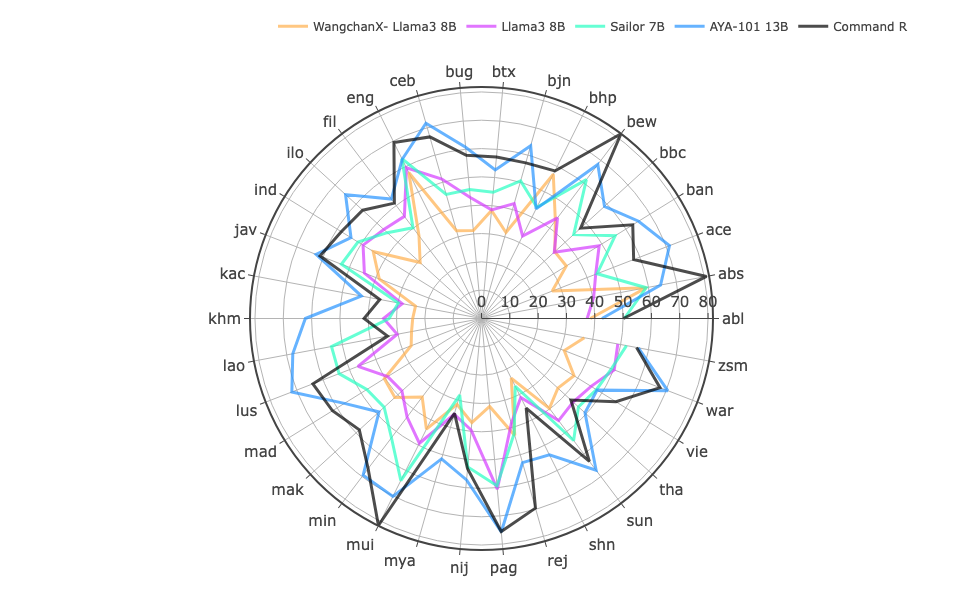

In [902]:
import plotly.express as px

fig = go.Figure()

pdf = df[(df['prompt_lang'] == 'eng')].groupby(['model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf['group'] = pdf['model'].apply(lambda x: model_to_group[x])

for i, group in enumerate(pdf["group"].unique()):
    filtered_pdf = pdf[(pdf['group'] == group)].groupby(['model'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
    filtered_pdf = filtered_pdf.sort_values('weighted_f1_score', ascending=False)
    best_model_in_group = filtered_pdf['model'][0]

    best_model_in_group_pdf = pdf[(pdf['model'] == best_model_in_group)]
    
    fig.add_trace(go.Scatterpolar(
          r=best_model_in_group_pdf['weighted_f1_score'],
          theta=best_model_in_group_pdf["lang"].unique(),
          fill='none',
          line=dict(color=model_to_color[best_model_in_group] if group != 'Commercial' else '#000000', width=3),
          marker=dict(size=20, symbol=model_to_index[best_model_in_group]+100),
          name=model_to_display_name[best_model_in_group],
          opacity=0.7,
    ))

# fig.update_layout(
#     template='plotly_white',
# )

fig.update_layout(
    template='none',
    width=800,
    height=600,
    margin=dict(l=50, r=50, t=50, b=50),
    font_size = 15,
    showlegend = True,
    polar = dict(
      angularaxis = dict(
        linewidth = 2,
        showline=True,
        linecolor='light gray'
      ),
      radialaxis = dict(
        side = "counterclockwise",
        showline = True,
        linewidth = 1,
        gridcolor = "light gray",
        gridwidth = 1,
      ),
    ),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.1,
        xanchor="right",
        x=1.0,
        font_size=12,
    )
)

fig.write_image('../figures/nlu/weighted_f1_score_per_lang_grouped.pdf')
fig.show()

Wind Rose version

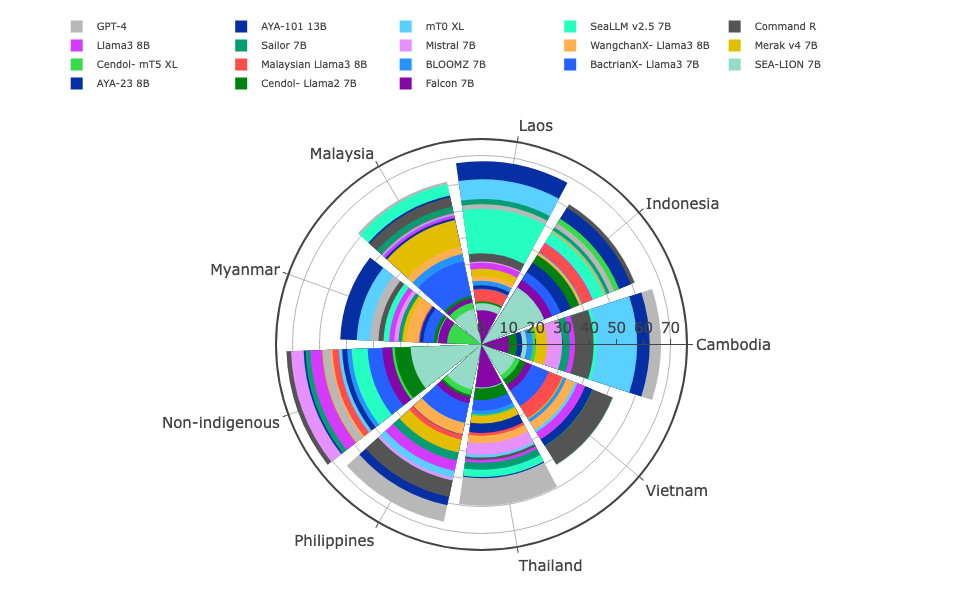

In [868]:
import plotly.express as px

fig = go.Figure()

n_model = len(df['model'].unique())

pdf = df[(df['prompt_lang'] == 'eng')].groupby(['region', 'model'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()

for i in range(n_model):

    top_i_lowest_scores = []
    top_i_models = []
    for region in pdf['region'].unique():
        sorted_pdf = pdf[pdf['region'] == region].sort_values('weighted_f1_score', ascending=False).reset_index()
        # print(pdf)
        top_i_lowest_scores.append(sorted_pdf['weighted_f1_score'][i])
        top_i_models.append(sorted_pdf['model'][i])
        
    fig.add_trace(go.Barpolar(
          r=top_i_lowest_scores,
          theta=pdf["region"].unique(),
          base="overlay",
          # fill='none',
          # line=dict(color=model_to_individual_color[model], width=2),
          # marker=dict(size=10, symbol="3"),
          marker=dict(color=[model_to_individual_color[model] for model in top_i_models]),
          name=model_to_display_name[top_i_models[0]],
          opacity=1,
    ))

# fig.update_layout(
#     template='plotly_white',
# )

fig.update_layout(
    template='none',
    width=800,
    height=600,
    margin=dict(l=50, r=50, t=50, b=50),
    font_size = 15,
    showlegend = True,
    polar = dict(
      angularaxis = dict(
        linewidth = 2,
        showline=True,
        linecolor='light gray'
      ),
      radialaxis = dict(
        side = "counterclockwise",
        showline = True,
        linewidth = 1,
        gridcolor = "light gray",
        gridwidth = 1,
      ),
    ),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.1,
        xanchor="right",
        x=0.9,
        font_size=10,
    )
)

# fig.write_image('../figures/nlu/weighted_f1_score_per_region.pdf')
fig.show()

#### Per task

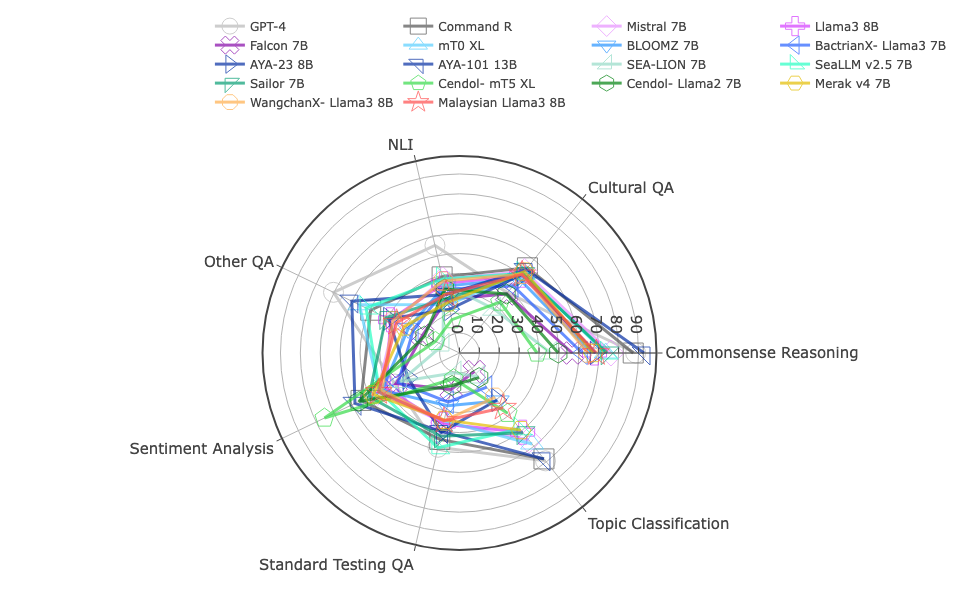

In [869]:
import plotly.express as px

fig = go.Figure()

for i, model in enumerate(model_to_index.keys()):
    if model not in df['model'].unique():
        continue
        
    pdf = df[(df['prompt_lang'] == 'eng') & (df['model'] == model)].groupby(['prompt_lang', 'task'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
    fig.add_trace(go.Scatterpolar(
          r=pdf['weighted_f1_score'],
          theta=pdf["task"].unique(),
          fill='none',
          line=dict(color=model_to_individual_color[model], width=3),
          marker=dict(size=20, symbol=i+100),
          name=model_to_display_name[model],
          opacity=0.7,
    ))

# fig.update_layout(
#     template='plotly_white',
# )

fig.update_layout(
    template='none',
    width=800,
    height=600,
    margin=dict(l=50, r=50, t=50, b=50),
    font_size = 15,
    showlegend = True,
    polar = dict(
      angularaxis = dict(
        linewidth = 2,
        showline=True,
        linecolor='light gray'
      ),
      radialaxis = dict(
        side = "counterclockwise",
        showline = True,
        linewidth = 1,
        gridcolor = "light gray",
        gridwidth = 1,
      ),
    ),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.1,
        xanchor="right",
        x=1.1,
        font_size=12,
    )
)

fig.write_image('../figures/nlu/weighted_f1_score_per_task.pdf')
fig.show()

Only the best model per group.

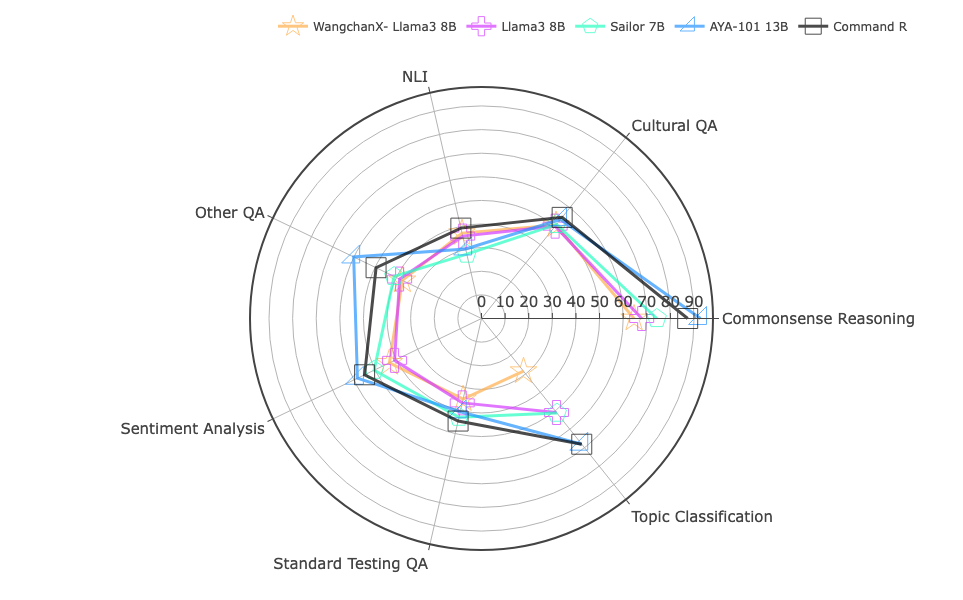

In [870]:
import plotly.express as px

fig = go.Figure()

pdf = df[(df['prompt_lang'] == 'eng')].groupby(['model', 'task'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf['group'] = pdf['model'].apply(lambda x: model_to_group[x])

for i, group in enumerate(pdf["group"].unique()):
    filtered_pdf = pdf[(pdf['group'] == group)].groupby(['model'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
    filtered_pdf = filtered_pdf.sort_values('weighted_f1_score', ascending=False)
    best_model_in_group = filtered_pdf['model'][0]

    best_model_in_group_pdf = pdf[(pdf['model'] == best_model_in_group)]
    
    fig.add_trace(go.Scatterpolar(
          r=best_model_in_group_pdf['weighted_f1_score'],
          theta=best_model_in_group_pdf["task"].unique(),
          fill='none',
          line=dict(color=model_to_color[best_model_in_group] if group != 'Commercial' else '#000000', width=3),
          marker=dict(size=20, symbol=model_to_index[best_model_in_group]+100),
          name=model_to_display_name[best_model_in_group],
          opacity=0.7,
    ))

# fig.update_layout(
#     template='plotly_white',
# )

fig.update_layout(
    template='none',
    width=800,
    height=600,
    margin=dict(l=50, r=50, t=50, b=50),
    font_size = 15,
    showlegend = True,
    polar = dict(
      angularaxis = dict(
        linewidth = 2,
        showline=True,
        linecolor='light gray'
      ),
      radialaxis = dict(
        side = "counterclockwise",
        showline = True,
        linewidth = 1,
        gridcolor = "light gray",
        gridwidth = 1,
      ),
    ),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.1,
        xanchor="right",
        x=1.0,
        font_size=12,
    )
)

fig.write_image('../figures/nlu/weighted_f1_score_per_task_grouped.pdf')
fig.show()

# NLG

In [877]:
dfs = []
for path in glob.glob('../evaluation/metrics_nlg/*.csv'):
    model = path[:-4].split('_')[-1]
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df['BLEU'] = df['BLEU'].astype(float)
    df['SacreBLEU'] = df['SacreBLEU'].astype(float)
    df['chrF++'] = df['chrF++'].astype(float)
    df['ROUGE1'] = df['ROUGE1'].astype(float)
    df['ROUGE2'] = df['ROUGE2'].astype(float)
    df['ROUGEL'] = df['ROUGEL'].astype(float)
    df['ROUGELsum'] = df['ROUGELsum'].astype(float)
    df['model'] = model
    df['prompt_lang'] = lang
    dfs.append(df)
    print(path)
df = pd.concat(dfs)
df = pd.merge(df, subset_lang_task_df, on="dataset")
df = df[df['model'] != 'Qwen-7B-Chat']
nlg_df = df.copy()

../evaluation/metrics_nlg/nlg_results_eng_0_Qwen-7B-Chat.csv
../evaluation/metrics_nlg/nlg_results_eng_0_aya-23-8B.csv
../evaluation/metrics_nlg/nlg_results_eng_0_Sailor-7B-Chat.csv
../evaluation/metrics_nlg/nlg_results_eng_0_falcon-7b-instruct.csv
../evaluation/metrics_nlg/nlg_results_eng_0_cendol-llama2-7b.csv
../evaluation/metrics_nlg/nlg_results_eng_0_mt0-xl.csv
../evaluation/metrics_nlg/nlg_results_eng_0_malaysian-llama-3-8b-instruct-16k.csv
../evaluation/metrics_nlg/nlg_results_eng_0_sea-lion-7b-instruct-research.csv
../evaluation/metrics_nlg/nlg_results_eng_0_bloomz-7b1.csv
../evaluation/metrics_nlg/nlg_results_eng_0_Merak-7B-v4.csv
../evaluation/metrics_nlg/nlg_results_eng_0_command-r.csv
../evaluation/metrics_nlg/nlg_results_eng_0_gpt-4.csv
../evaluation/metrics_nlg/nlg_results_eng_0_bactrian-x-llama-7b-merged.csv
../evaluation/metrics_nlg/nlg_results_eng_0_aya-101.csv
../evaluation/metrics_nlg/nlg_results_eng_0_LLaMa3-8b-WangchanX-sft-Demo.csv
../evaluation/metrics_nlg/nlg_re

In [878]:
df['model'].unique()

array(['aya-23-8B', 'Sailor-7B-Chat', 'falcon-7b-instruct',
       'cendol-llama2-7b', 'mt0-xl', 'malaysian-llama-3-8b-instruct-16k',
       'sea-lion-7b-instruct-research', 'bloomz-7b1', 'Merak-7B-v4',
       'command-r', 'gpt-4', 'bactrian-x-llama-7b-merged', 'aya-101',
       'LLaMa3-8b-WangchanX-sft-Demo', 'SeaLLM-7B-v2.5', 'cendol-mt5-xl',
       'Meta-Llama-3-8B-Instruct', 'Mistral-7B-Instruct-v0.2'],
      dtype=object)

In [879]:
df

,dataset,BLEU,SacreBLEU,chrF++,meteor,ROUGE1,ROUGE2,ROUGEL,ROUGELsum,BLEU_latin,...,ROUGE1_latin,ROUGE2_latin,ROUGEL_latin,ROUGELsum_latin,prompt_id,model,prompt_lang,lang,task,region
47,lr_sum_ind_seacrowd_t2t,2.149466,2.167877,31.094598,20.733634,15.508770,5.202519,12.096407,12.608191,2.146847,...,15.499577,5.189891,12.083485,12.600659,0,aya-23-8B,eng,ind,Summarization,Indonesia
48,lr_sum_vie_seacrowd_t2t,3.632079,3.585076,25.406860,23.217157,40.668032,16.172178,26.003738,27.211383,0.165088,...,4.623755,0.473664,3.775586,3.909261,0,aya-23-8B,eng,vie,Summarization,Vietnam
49,lr_sum_lao_seacrowd_t2t,0.057769,0.015500,1.465606,2.568782,0.346306,0.042607,0.335660,0.337182,0.016390,...,0.323220,0.040324,0.309557,0.313582,0,aya-23-8B,eng,lao,Summarization,Laos
50,lr_sum_tha_seacrowd_t2t,0.000000,0.034837,3.980365,1.811308,1.349077,0.164963,1.105145,1.151658,0.045489,...,1.300950,0.166128,1.044690,1.098139,0,aya-23-8B,eng,tha,Summarization,Thailand
51,lr_sum_khm_seacrowd_t2t,0.000000,0.004568,0.467519,0.151861,0.103704,0.009407,0.098521,0.098167,0.000000,...,0.107765,0.009407,0.103606,0.104640,0,aya-23-8B,eng,khm,Summarization,Cambodia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,qasina_seacrowd_qa,4.398098,4.005960,28.467273,36.295209,26.344217,16.644834,26.198511,26.151219,4.398098,...,26.331674,16.675227,26.190287,26.053091,0,Mistral-7B-Instruct-v0.2,eng,ind,Question Answering,Indonesia
1843,mkqa_khm_seacrowd_qa,0.007768,0.005065,2.273442,0.342763,0.218778,0.023872,0.213449,0.213522,0.004753,...,0.212911,0.023610,0.208508,0.207322,0,Mistral-7B-Instruct-v0.2,eng,khm,Question Answering,Cambodia
1844,mkqa_zsm_seacrowd_qa,0.076498,0.082723,5.971744,3.302485,1.656499,0.628698,1.645460,1.643459,0.076030,...,1.658529,0.629604,1.641127,1.644250,0,Mistral-7B-Instruct-v0.2,eng,zsm,Question Answering,Malaysia
1845,mkqa_tha_seacrowd_qa,0.016167,0.007436,1.554107,0.574222,0.541082,0.065865,0.517022,0.517927,0.006673,...,0.507618,0.063417,0.485192,0.488332,0,Mistral-7B-Instruct-v0.2,eng,tha,Question Answering,Thailand


In [880]:
df[(df['prompt_lang'] == 'eng')].groupby(['model','prompt_lang'])[['SacreBLEU','ROUGE1', 'ROUGE2', 'ROUGEL','chrF++']].mean().sort_values(['SacreBLEU', 'model'])

,,SacreBLEU,ROUGE1,ROUGE2,ROUGEL,chrF++
model,prompt_lang,,,,,
gpt-4,eng,0.171833,7.320460,0.427906,5.787539,14.195239
sea-lion-7b-instruct-research,eng,1.368545,11.632499,3.473209,9.331362,22.465933
falcon-7b-instruct,eng,1.412283,10.812370,2.337227,8.886076,14.861402
aya-23-8B,eng,1.846321,13.170164,4.138300,10.656042,22.516767
Merak-7B-v4,eng,2.441500,10.790519,3.496569,9.892825,19.370485
bactrian-x-llama-7b-merged,eng,2.613304,15.610229,4.420916,13.164853,21.933116
Meta-Llama-3-8B-Instruct,eng,2.797331,15.586375,6.355266,13.531491,25.048424
mt0-xl,eng,2.897151,10.029392,3.436503,8.638474,14.692001
bloomz-7b1,eng,3.032494,9.064731,3.605112,7.862078,13.401967


## MT Directional

### MT Eng -> XX

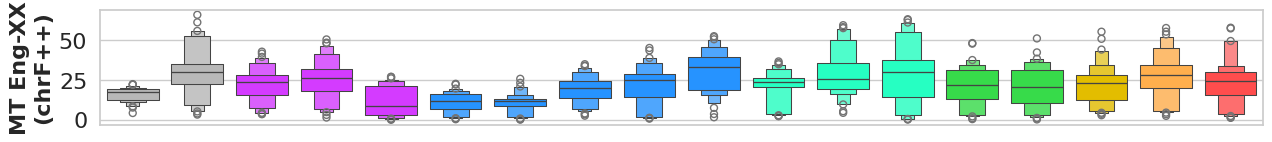

In [881]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df[(df['task'] == 'MT Eng -> XX')].groupby(['dataset', 'model', 'task'])[['chrF++']].mean().reset_index()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf.sort_values('model_id')

color_values = [v for k, v in model_to_color.items() if k in pdf["model"].unique()]

ax = sns.boxenplot(data=pdf, x='model_name', y='chrF++', hue='model', k_depth=3, dodge=False, palette=color_values, saturation=1)

ax.get_legend().set_visible(False)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('MT Eng-XX\n(chrF++)', fontdict={'weight': 'bold'}, fontsize=16)
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('../figures/nlg/chrf_mt2xx.pdf', bbox_inches='tight')
plt.show()

### MT XX-Eng

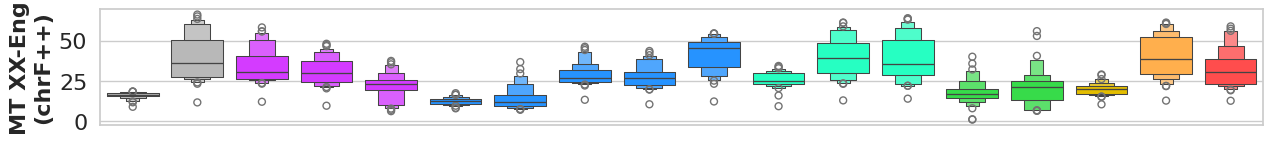

In [882]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df[(df['task'] == 'MT XX -> Eng')].groupby(['dataset', 'model', 'task'])[['chrF++']].mean().reset_index()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf.sort_values('model_id')

color_values = [v for k, v in model_to_color.items() if k in pdf["model"].unique()]

ax = sns.boxenplot(data=pdf, x='model_name', y='chrF++', hue='model', k_depth=3, dodge=False, palette=color_values, saturation=1)

ax.get_legend().set_visible(False)
plt.xticks(rotation=50, fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('MT XX-Eng\n(chrF++)', fontdict={'weight': 'bold'}, fontsize=16)
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('../figures/nlg/chrf_mt2eng.pdf', bbox_inches='tight')
plt.show()

## QA (Abstractive & Extractive)

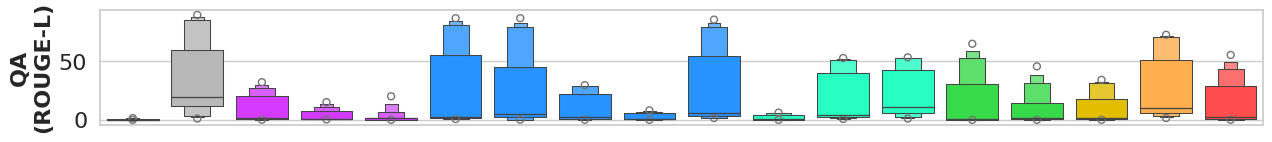

In [883]:
sns.set(rc={'figure.figsize':(15, 1.5)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df[(df['task'] == 'Question Answering')].groupby(['dataset', 'model', 'task'])[['ROUGEL']].mean().reset_index()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf.sort_values('model_id')

color_values = [v for k, v in model_to_color.items() if k in pdf["model"].unique()]

ax = sns.boxenplot(data=pdf, x='model_name', y='ROUGEL', hue='model', k_depth=3, dodge=False, palette=color_values, saturation=1)

ax.get_legend().set_visible(False)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('QA\n(ROUGE-L)', fontdict={'weight': 'bold'}, fontsize=16)
plt.xlabel(None)
plt.xticks([], [])
plt.savefig('../figures/nlg/rouge-l_qa.pdf', bbox_inches='tight')
plt.show()

## Summarization

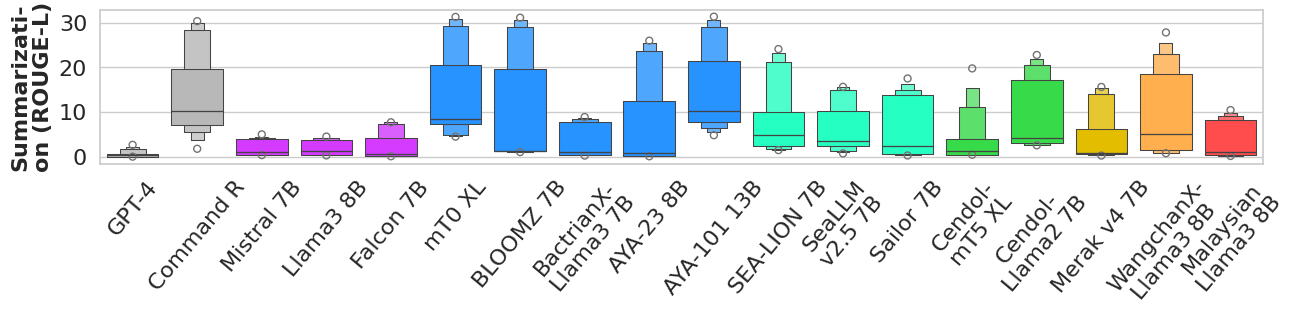

In [884]:
sns.set(rc={'figure.figsize':(15, 2)})

sns.set_theme(style="whitegrid", palette=None)

pdf = df[(df['task'] == 'Summarization')].groupby(['dataset', 'model', 'task'])[['ROUGEL']].mean().reset_index()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf = pdf.sort_values('model_id')

color_values = [v for k, v in model_to_color.items() if k in pdf["model"].unique()]

ax = sns.boxenplot(data=pdf, x='model_name', y='ROUGEL', hue='model', k_depth=3, dodge=False, palette=color_values, saturation=1)

ax.get_legend().set_visible(False)
plt.xticks(rotation=50, fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Summarizati-\non (ROUGE-L)', fontdict={'weight': 'bold'}, fontsize=16)
plt.xlabel(None)
# plt.xticks([], [])
plt.savefig('../figures/nlg/rougel_summarization.pdf', bbox_inches='tight')
plt.show()

# Speech

In [1110]:
lang_to_metric = {
    'ind': 'wer',
    'jav': 'wer',
    'sun': 'wer',
    'vie': 'wer',
    'mya': 'cer',
    'fil': 'wer',
    'btx': 'wer',
    'zlm': 'wer',
    'iba': 'wer',
    'ceb': 'wer',
    'ban': 'wer',
    'lao': 'cer',
    'khm': 'cer',
    'tha': 'cer',
    'cnh': 'cer',
}

In [1131]:
dfs = []
for path in glob.glob('../evaluation/metrics_speech/*.csv'):
    model = path[:-4].split('_')[-1]
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df['wer'] = df['wer'].astype(float)
    df['mer'] = df['mer'].astype(float)
    df['cer'] = df['cer'].astype(float)
    df['model'] = model
    dfs.append(df)
    print(path)
df = pd.concat(dfs)
df = pd.merge(df, subset_lang_task_df, on="dataset")
df['score'] = [df[lang_to_metric[df['lang'][i]]][i] for i in range(len(df))]
# df = df[df['dataset'] != 'xpersona_id_nusantara_t2t']

../evaluation/metrics_speech/speech_results_wav2vec2-bloom-speech-tgl.csv
../evaluation/metrics_speech/speech_results_seamless-m4t-v2-large.csv
../evaluation/metrics_speech/speech_results_whisper-large-v3.csv
../evaluation/metrics_speech/speech_results_wav2vec2-xlsr-53-espeak-cv-ft.csv
../evaluation/metrics_speech/speech_results_wav2vec2-large-xlsr-53.csv
../evaluation/metrics_speech/speech_results_wav2vec2-indonesian-javanese-sundanese.csv
../evaluation/metrics_speech/speech_results_whisper-large-khmer-asr.csv
../evaluation/metrics_speech/speech_results_whisper-th-large-v3-combined.csv
../evaluation/metrics_speech/speech_results_wav2vec2-large-vi-vlsp2020.csv
../evaluation/metrics_speech/speech_results_wav2vec2-large-xlsr-53-english.csv
../evaluation/metrics_speech/speech_results_wav2vec2-xls-r-300m-khmer.csv
../evaluation/metrics_speech/speech_results_whisper-large-id.csv
../evaluation/metrics_speech/speech_results_wav2vec2-bloom-speech-mya.csv
../evaluation/metrics_speech/speech_res

In [1132]:
df.head()

,dataset,fold,wer,mer,cer,model,lang,task,region,score
0,commonvoice_120_ind_seacrowd_sptext,test,1.040757,0.975260,0.443932,wav2vec2-bloom-speech-tgl,ind,ASR,Indonesia,1.040757
1,indspeech_newstra_ethnicsr_nooverlap_jav_seacr...,test,0.994633,0.924049,0.351586,wav2vec2-bloom-speech-tgl,jav,ASR,Indonesia,0.994633
2,indspeech_newstra_ethnicsr_nooverlap_sun_seacr...,test,0.981469,0.912994,0.314181,wav2vec2-bloom-speech-tgl,sun,ASR,Indonesia,0.981469
3,fleurs_vie_seacrowd_sptext,test,0.998378,0.998224,0.691053,wav2vec2-bloom-speech-tgl,vie,ASR,Vietnam,0.998378
4,fleurs_jav_seacrowd_sptext,test,1.051129,0.968632,0.446584,wav2vec2-bloom-speech-tgl,jav,ASR,Indonesia,1.051129


In [1133]:
df.groupby(['model']).mean('score').sort_values('score')

,wer,mer,cer,score
model,,,,
whisper-large-v3,0.708308,0.599685,0.299938,0.513444
mms-1b-all,0.557233,0.549030,0.349705,0.532830
seamless-m4t-v2-large,1.256044,0.615236,0.454128,0.536290
whisper-large-id,1.011140,0.636278,0.326633,0.559048
whisper-th-large-v3-combined,1.008398,0.682665,0.413731,0.635193
wav2vec2-indonesian-javanese-sundanese,1.347087,0.708133,0.456290,0.694086
whisper-large-khmer-asr,1.227229,0.715530,0.546660,0.702591
wav2vec2-large-xlsr-indonesian,1.441596,0.754821,0.470830,0.744683
wav2vec2-bloom-speech-tgl,1.751969,0.930190,0.574390,0.949433


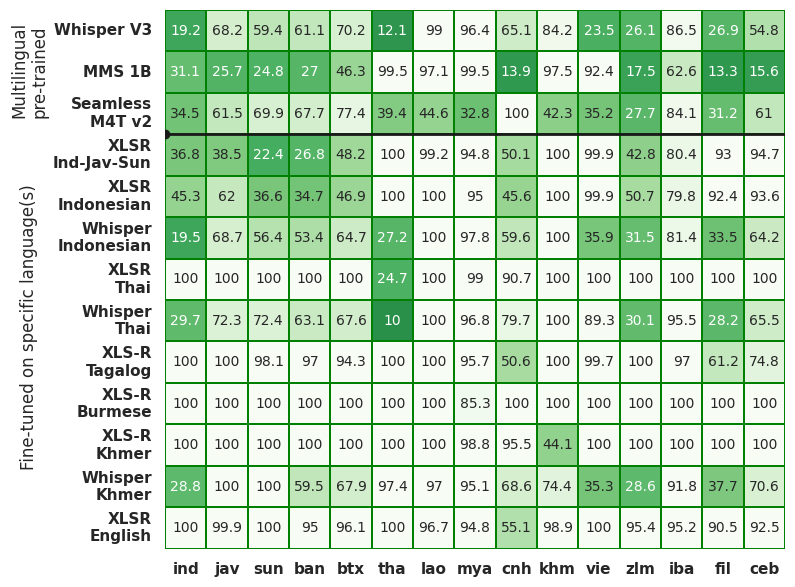

In [1137]:
which_score = "score"

heatmap_df = df.groupby(['model', 'region', 'lang'])[[which_score]].mean().sort_values(['model', 'lang']).reset_index()
heatmap_df = heatmap_df[heatmap_df['model'].isin(model_to_index.keys())]
heatmap_df[which_score] = heatmap_df[which_score].apply(lambda x: 1 if x > 1 else x)
heatmap_df[which_score] = heatmap_df[which_score].apply(lambda x: 100*x)
heatmap_df['model_name'] = heatmap_df['model'].apply(lambda x: model_to_display_name[x])
heatmap_df['model_id'] = heatmap_df['model'].apply(lambda x: model_to_index[x])
model_order = [model_to_display_name[key] for key, _ in sorted(model_to_index.items(), key=lambda item: item[1]) if key in heatmap_df['model'].unique()]
# heatmap_df = heatmap_df.sort_values(['region', 'lang'])
heatmap_df = heatmap_df.pivot_table(
    index='model_name', columns='lang', values=which_score).reindex(
    model_order, axis=0).reindex(
    ['ind', 'jav', 'sun', 'ban', 'btx', 'tha', 'lao', 'mya', 'cnh', 'khm', 'vie', 'zlm', 'iba', 'fil', 'ceb'], axis=1)

sns.set_theme(rc={'figure.figsize':(8, 7)})
sns.set(font_scale=1)
sns.set_style('whitegrid')

ax = sns.heatmap(
    heatmap_df, annot=True,
    cmap='Greens_r',
    # cmap=matplotlib.colors.ListedColormap(['#709633', '#AACB73', '#CDE990', '#FFFFE8', '#FFD4D4',], name='my_colormap_name'),
    fmt='.3g',
    vmin=-20,
    vmax=90,
    linewidth=0.1, linecolor="green",
    cbar=False, annot_kws={"fontsize": 10})

# Set bold ticks
ax.tick_params(axis='both', which='major', labelsize=11)
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
ax.set_ylabel("")
ax.set_xlabel("")
# ax.set_title(which_score)

ax.text(-3.75, 2.5, "Multilingual\npre-trained", rotation=90)
ax.text(-3.5, 11, "Fine-tuned on specific language(s)", rotation=90)

x1, y1 = [0, 20], [3, 3]
plt.plot(x1, y1, color="k", marker='o', linewidth=2)

plt.savefig('../figures/speech/asr_results.pdf', bbox_inches='tight')

# VL

In [946]:
dfs = []
for path in glob.glob('../evaluation/metrics_vl/*.csv'):
    model = path[:-4].split('_')[-1]
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df['CIDEr'] = df['CIDEr'].astype(float)
    df['meteor'] = df['meteor'].astype(float)
    df['model'] = model
    df['prompt_lang'] = lang
    # if lang == 'eng':
    #     df['CIDEr'] = -1 * df['CIDEr']
    #     df['meteor'] = -1 * df['meteor']
    dfs.append(df)
    print(path)
df = pd.concat(dfs)
df = pd.merge(df, subset_lang_task_df, on="dataset")

../evaluation/metrics_vl/vl_results_eng_idefics2-8b.csv
../evaluation/metrics_vl/vl_results_local_instructblip-vicuna-7b.csv
../evaluation/metrics_vl/vl_results_local_llava-1.5-7b-hf.csv
../evaluation/metrics_vl/vl_results_eng_llava-v1.6-mistral-7b-hf.csv
../evaluation/metrics_vl/vl_results_eng_instructblip-vicuna-7b.csv
../evaluation/metrics_vl/vl_results_eng_llava-1.5-7b-hf.csv
../evaluation/metrics_vl/vl_results_local_idefics2-8b.csv
../evaluation/metrics_vl/vl_results_eng_mblip-mt0-xl.csv
../evaluation/metrics_vl/vl_results_local_paligemma-3b-mix-224.csv
../evaluation/metrics_vl/vl_results_local_mblip-mt0-xl.csv
../evaluation/metrics_vl/vl_results_eng_paligemma-3b-mix-224.csv
../evaluation/metrics_vl/vl_results_local_llava-v1.6-mistral-7b-hf.csv


In [947]:
df.head()

,dataset,BLEU,SacreBLEU,meteor,ROUGE1,ROUGE2,ROUGEL,ROUGELsum,CIDEr,prompt_id,model,prompt_lang,lang,task,region
0,xm3600_fil_seacrowd_imtext,0.060114,0.060070,1.523253,1.433449,0.169293,1.381094,1.382638,0.020619,0,idefics2-8b,eng,fil,Image Captioning,Philippines
1,xm3600_id_seacrowd_imtext,0.031599,0.031139,0.792146,0.998194,0.116154,0.971639,0.976999,0.014470,0,idefics2-8b,eng,ind,Image Captioning,Indonesia
2,xm3600_th_seacrowd_imtext,0.061474,0.060962,0.483494,0.495913,0.220607,0.492749,0.496938,0.007143,0,idefics2-8b,eng,tha,Image Captioning,Thailand
3,xm3600_vi_seacrowd_imtext,0.000000,0.006694,0.777186,1.703416,0.011217,1.669729,1.669295,0.004836,0,idefics2-8b,eng,vie,Image Captioning,Vietnam
4,xm3600_fil_seacrowd_imtext,0.000000,0.006330,0.983250,2.178439,0.125415,2.129033,2.136752,0.029721,0,instructblip-vicuna-7b,local,fil,Image Captioning,Philippines


In [948]:
df.groupby(['prompt_lang', 'model', 'lang'])[['CIDEr', 'meteor']].mean(['CIDEr', 'meteor'])

CIDEr     meteor
prompt_lang model                    lang                         
eng         idefics2-8b              fil   2.061947e-02   1.523253
                                     ind   1.446984e-02   0.792146
                                     tha   7.143379e-03   0.483494
                                     vie   4.835503e-03   0.777186
            instructblip-vicuna-7b   fil   8.175283e-04   1.310031
                                     ind   1.201373e-04   0.865706
                                     tha   1.441709e-08   0.121181
                                     vie   2.554341e-04   0.823939
            llava-1.5-7b-hf          fil   1.883096e-04   0.403359
                                     ind   2.626096e-05   0.131491
                                     tha   7.633189e-06   0.027226
                                     vie   6.798635e-05   0.529934
            llava-v1.6-mistral-7b-hf fil   1.284639e-03   0.340239
                                     ind   7.006207e-04   0.115156
                                     tha   9.707250e-05   0.023110
                                     vie   6.222797e-06   0.258200
            mblip-mt0-xl             fil   2.394926e-02  16.200032
                                     ind   1.748799e-01  16.941778
                                     tha   1.064287e-03   0.031731
                                     vie   2.116305e-01  18.994108
            paligemma-3b-mix-224     fil   6.787755e-03   0.943206
                                     ind   7.030330e-03   0.500432
                                     tha   3.179928e-04   0.333038
                                     vie   1.456573e-03   0.698178
local       idefics2-8b              fil   2.010281e-02   1.575564
                                     ind   1.527468e-02   0.840284
                                     tha   7.171574e-03   0.455221
                                     vie   4.513784e-03   0.782755
            instructblip-vicuna-7b   fil   2.972062e-02   0.983250
                                     ind   1.442028e-02   0.602473
                                     tha   2.262905e-04   0.168781
                                     vie   2.203111e-03   0.112279
            llava-1.5-7b-hf          fil   2.703346e-06   0.391083
                                     ind   1.112050e-04   0.134175
                                     tha   0.000000e+00   0.011176
                                     vie   7.196190e-06   0.549425
            llava-v1.6-mistral-7b-hf fil   2.642949e-03   1.014297
                                     ind   4.341877e-03   1.027279
                                     tha   0.000000e+00   0.006653
                                     vie   6.821499e-03   1.333784
            mblip-mt0-xl             fil   1.898040e-02  16.757067
                                     ind   4.817374e-02  16.399172
                                     tha   9.713801e-04   0.032642
                                     vie   2.351224e-01  19.156792
            paligemma-3b-mix-224     fil   3.012440e-01  23.339669
                                     ind   3.281241e-01  19.376933
                                     tha   2.077279e-03   0.109832
                                     vie   4.883999e-01  24.306740

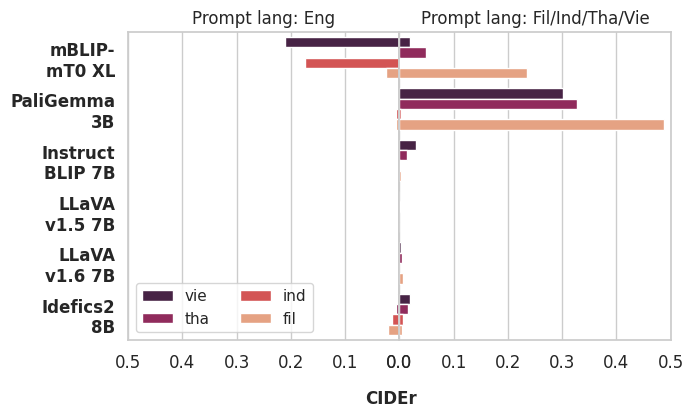

In [979]:
sns.set(font_scale=1)
sns.set_style('whitegrid')

pdf = df.groupby(['prompt_lang', 'model', 'lang'])[['CIDEr', 'meteor']].mean(['CIDEr', 'meteor']).reset_index()
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf = pdf.sort_values(['model_id'])

fig, axes = plt.subplots(
    1, 2, figsize=(7, 4),
    sharey=True,
    # sharex=True,
)

sns.barplot(
    ax=axes[0],
    data=pdf[pdf['prompt_lang'] == 'eng'], x="CIDEr", y="model_name",
    hue="lang", palette='rocket',
)

sns.barplot(
    ax=axes[1],
    data=pdf[pdf['prompt_lang'] == 'local'], x="CIDEr", y="model_name", legend=None,
    hue="lang", palette='rocket',
)

axes[0].tick_params(axis='y', rotation=0)
axes[0].set_ylabel("")
axes[0].set_xlabel("")
# axes[0].set(xscale='log')
axes[0].invert_xaxis()
axes[0].title.set_text('Prompt lang: Eng')
axes[0].set(xlim=(0.5, 0))
axes[0].tick_params(axis='both', which='major', labelsize=12)
for tick in axes[0].get_yticklabels():
    tick.set_fontweight('bold')
    tick.set_fontsize(12)

axes[1].set_ylabel("")
axes[1].set_xlabel("")
# axes[1].set(xscale='log')
axes[1].title.set_text('Prompt lang: Fil/Ind/Tha/Vie')
axes[0].legend(loc='lower left', ncol=2)
axes[1].set(xlim=(0, 0.5))
axes[1].tick_params(axis='both', which='major', labelsize=12)

fig.text(0.5, -0.05, 'CIDEr', ha='center', font={'weight': 'bold'})
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
# fig.legend(ncol=4, bbox_to_anchor=(0.8, 1.05))

fig.savefig('../figures/vl/cider_image_captioning.pdf', bbox_inches='tight')

plt.show()

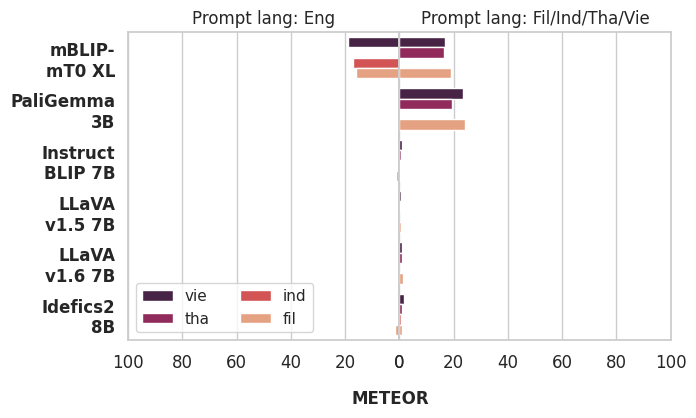

In [973]:
sns.set(font_scale=1)
sns.set_style('whitegrid')

pdf = df.groupby(['prompt_lang', 'model', 'lang'])[['CIDEr', 'meteor']].mean(['CIDEr', 'meteor']).reset_index()
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf = pdf.sort_values(['model_id'])

fig, axes = plt.subplots(
    1, 2, figsize=(7, 4),
    sharey=True,
    # sharex=True,
)

sns.barplot(
    ax=axes[0],
    data=pdf[pdf['prompt_lang'] == 'eng'], x="meteor", y="model_name",
    hue="lang", palette='rocket',
)

sns.barplot(
    ax=axes[1],
    data=pdf[pdf['prompt_lang'] == 'local'], x="meteor", y="model_name", legend=None,
    hue="lang", palette='rocket',
)

axes[0].tick_params(axis='y', rotation=0)
axes[0].set_ylabel("")
axes[0].set_xlabel("")
# axes[0].set(xscale='log')
axes[0].invert_xaxis()
axes[0].title.set_text('Prompt lang: Eng')
axes[0].set(xlim=(100, 0))
axes[0].tick_params(axis='both', which='major', labelsize=12)
for tick in axes[0].get_yticklabels():
    tick.set_fontweight('bold')
    tick.set_fontsize(12)

axes[1].set_ylabel("")
axes[1].set_xlabel("")
# axes[1].set(xscale='log')
axes[1].title.set_text('Prompt lang: Fil/Ind/Tha/Vie')
axes[0].legend(loc='lower left', ncol=2)
axes[1].set(xlim=(0, 100))
axes[1].tick_params(axis='both', which='major', labelsize=12)

fig.text(0.5, -0.05, 'METEOR', ha='center', font={'weight': 'bold'})
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
# fig.legend(ncol=4, bbox_to_anchor=(0.8, 1.05))

fig.savefig('../figures/vl/meteor_image_captioning.pdf', bbox_inches='tight')

plt.show()

# Language Equality

Gini coefficient per model.

In [808]:
all_dict = {'model': [], 'dataset': [], 'lang': [], 'prompt_lang': [], 'performance': []}
for i in range(len(nlu_df)):
    all_dict['model'].append(nlu_df['model'][i])
    all_dict['dataset'].append(nlu_df['dataset'][i])
    all_dict['lang'].append(nlu_df['lang'][i])
    all_dict['prompt_lang'].append(nlu_df['prompt_lang'][i])
    all_dict['performance'].append(nlu_df['weighted_f1_score'][i])
for i in range(len(nlg_df)):
    all_dict['model'].append(nlg_df['model'][i])
    all_dict['dataset'].append(nlg_df['dataset'][i])
    all_dict['lang'].append(nlg_df['lang'][i])
    all_dict['prompt_lang'].append(nlg_df['prompt_lang'][i])
    if "MT" in nlg_df['task'][i]:
        all_dict['performance'].append(nlg_df['chrF++'][i])
    else:
        all_dict['performance'].append(nlg_df['ROUGEL'][i])
all_df = pd.DataFrame.from_dict(all_dict)
all_df.head()

,model,dataset,lang,prompt_lang,performance
0,Mistral-7B-Instruct-v0.2,sib_200_bjn_Latn_seacrowd_text,bjn,eng,63.726059
1,Mistral-7B-Instruct-v0.2,sib_200_bjn_Latn_seacrowd_text,bjn,eng,57.745526
2,Mistral-7B-Instruct-v0.2,sib_200_bjn_Latn_seacrowd_text,bjn,eng,61.401660
3,Mistral-7B-Instruct-v0.2,xcopa_ind_seacrowd_qa,ind,eng,50.916494
4,Mistral-7B-Instruct-v0.2,xcopa_ind_seacrowd_qa,ind,eng,51.614536


In [809]:
def gini(n_lang_speakers, avg_performances_per_lang, tau=1):
    assert len(n_lang_speakers) == len(avg_performances_per_lang)
    n_lang_speakers = adjust_populations(n_lang_speakers, tau=tau)
    N = len(n_lang_speakers)
    sum_nom = 0
    sum_denom = 0
    for i in range(N):
        for j in range(N):
            sum_nom += (
                n_lang_speakers[i] * n_lang_speakers[j] * np.abs(avg_performances_per_lang[i] - avg_performances_per_lang[j])
            )
        sum_denom += n_lang_speakers[i] * avg_performances_per_lang[i]
    return sum_nom / (2 * np.sum(n_lang_speakers) * sum_denom)

def adjust_populations(populations, tau=1):
    def include_diversity(l, tau):
        speakers_arr = np.array(l)
        speakers_arr = [f**tau for f in speakers_arr]
        N = sum(speakers_arr)
        speakers_arr = [f / N for f in speakers_arr]
        return list(speakers_arr)
    populations = include_diversity(populations, tau=tau)
    N = np.sum(populations)
    old_populations = [p / N for p in populations]
    populations = include_diversity(old_populations, tau=tau)
    return populations

In [810]:
pdf = all_df[(all_df['prompt_lang'] == 'eng')].groupby(['model', 'prompt_lang', 'lang'])[['performance']].mean().sort_values(['model', 'lang'], ascending=False).reset_index()
pop_pdf = population_df[population_df.lang.isin(pdf['lang'].unique())]

for tau in [0.01, 0.2, 0.3, 0.5, 0.7, 1.0]:
    gini_coeff_dict = {'model': [], 'gini': []}
    for model in model_to_index.keys():
        if model not in pdf['model'].unique():
            continue
        model_pdf = pdf[pdf['model'] == model].merge(pop_pdf, on='lang', how='inner')
        gini_coeff = gini(model_pdf['population'].tolist(), model_pdf['performance'], tau=tau)
        gini_coeff_dict['model'].append(model)
        gini_coeff_dict['gini'].append(gini_coeff)
    
    gini_coeff_df = pd.DataFrame.from_dict(gini_coeff_dict)
    gini_coeff_df = gini_coeff_df.sort_values(['gini'])
    gini_coeff_df.to_csv(f'./analysis/gini_coeff_tau_{str(tau).replace(".", "_")}.csv')

# Unseen Data Evaluation

In [ ]:
nlu_unseen_data = [
       'wrete_nusantara_pairs',
       'id_google_play_review_nusantara_text',
       # 'emotion_id_opinion_nusantara_text',
       # 'id_abusive_news_comment_nusantara_text',
       # 'sentiment_nathasa_review_nusantara_text',
       'id_hsd_nofaaulia_nusantara_text',
       'code_mixed_jv_id_jv_nusantara_text',
       'id_google_play_review_posneg_nusantara_text',
]

nlu_unseen_tasks = [
       'id_short_answer_grading_nusantara_pairs_score',
       'id_stance_nusantara_pairs',
       'indolem_ntp_nusantara_pairs',
       'jadi_ide_nusantara_text',
]

nlu_unseen_langs = [
       'nusax_senti_ace_nusantara_text',
       'nusax_senti_ban_nusantara_text',
       'nusax_senti_bjn_nusantara_text',
       'nusax_senti_bug_nusantara_text',
       'nusax_senti_mad_nusantara_text',
       'nusax_senti_nij_nusantara_text',
]

In [ ]:
dfs = []
for path in glob.glob('metrics_nlu/*.csv'):
    model = path[:-4].split('_')[-1]
    if model == 'sealion7b':
        continue
    elif "vocab" in model:
        continue
    elif model == "old":
        continue
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df['accuracy'] = df['accuracy'].astype(float) * 100
    df['macro_f1_score'] = df['macro_f1_score'].astype(float) * 100
    df['weighted_f1_score'] = df['weighted_f1_score'].astype(float) * 100
    df['model'] = model
    df['lang'] = lang
    dfs.append(df)
df = pd.concat(dfs)

In [ ]:
(df.dataset.isin(nlu_unseen_data)).sum(), (df.dataset.isin(nlu_unseen_tasks)).sum(), (df.dataset.isin(nlu_unseen_langs)).sum()

In [ ]:
def eval_type(x):
    if x in nlu_unseen_data:
        return 'Unseen Data'
    if x in nlu_unseen_tasks:
        return 'Unseen Tasks'
    if x in nlu_unseen_langs:
        return 'Unseen Language'
df['eval_type'] = df['dataset'].apply(eval_type)

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
sns.set(font_scale=1.2)

pdf = df.groupby(['dataset', 'model', 'lang', 'eval_type'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].median().reset_index()
pdf = pdf[pdf['dataset'].isin(nlu_unseen_langs)]
pdf = pdf[(~pdf['model'].str.contains('chat')) & (pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
pdf['task_lang'] = pdf['dataset'].apply(lambda x: x.split('_')[2])

pdf = pdf.pivot(index=['model_id', 'model_name'], columns='task_lang', values='weighted_f1_score').reset_index()
ax = sns.heatmap(pdf[['model_id', 'ace', 'ban', 'bjn', 'bug', 'mad', 'nij']].set_index('model_id'), annot=True, fmt='.2f', cmap='viridis', cbar=False)
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], pdf['model_name'], rotation=0)
# plt.legend(loc='upper center',  ncols=7)
# # ax.get_legend().set_visible(False)
# plt.xticks(rotation=0, fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.xticks(rotation=0, fontsize=18)
plt.ylabel(None)
plt.xlabel(None)
# plt.yticks(fontsize=16)
plt.savefig('./figures/unseen_lang_nlu.pdf', bbox_inches='tight')
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(6,4)})
# sns.set(font_scale=1.2)

# sns.set_theme(style="whitegrid", palette=None)

pdf = df.groupby(['dataset', 'model', 'lang', 'eval_type'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].median().reset_index()
pdf = pdf[pdf['dataset'].isin(nlu_unseen_langs)]
pdf = pdf[(~pdf['model'].str.contains('chat')) & (pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
pdf['task_lang'] = pdf['dataset'].apply(lambda x: x.split('_')[2])
# pdf = pdf[~("LLaMA2" in pdf['model_name'].str)]
pdf = pdf[(~pdf['model'].str.startswith('cendol-llama2'))]
pdf = pdf.pivot(index=['model_id', 'model_name'], columns='task_lang', values='weighted_f1_score').reset_index()
pdf = pdf.melt(id_vars=["model_id", "model_name"], 
        var_name="lang", 
        value_name="weighted_f1_score")
pdf["model_name"] = pdf["model_name"].apply(lambda x: x.replace("Cendol\nmT5 ", ""))

ax = sns.lineplot(data=pdf,
             x="model_name", y="weighted_f1_score",
             hue="lang", style="lang",
             markers=True, dashes=False, markersize=18,
             palette="viridis", legend=False,
)

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles, labels=labels)

plt.yticks(rotation=0, fontsize=18)
plt.xticks(rotation=0, fontsize=18, fontweight="bold")
plt.ylabel("Weighted F1", fontdict={"weight": "bold", "size": 18})
plt.xlabel("Cendol mT5", fontdict={"weight": "bold", "size": 18})
plt.yticks(np.arange(10, 100, 20))

plt.savefig('./figures/unseen_lang_nlu_cendol_mt5.pdf', bbox_inches='tight')

In [ ]:
sns.set(rc={'figure.figsize':(2.25,4)})
# sns.set(font_scale=1.2)

# sns.set_theme(style="whitegrid", palette=None)

pdf = df.groupby(['dataset', 'model', 'lang', 'eval_type'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].median().reset_index()
pdf = pdf[pdf['dataset'].isin(nlu_unseen_langs)]
pdf = pdf[(~pdf['model'].str.contains('chat')) & (pdf['model'].str.contains('cendol'))]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
pdf['task_lang'] = pdf['dataset'].apply(lambda x: x.split('_')[2])
# pdf = pdf[~("LLaMA2" in pdf['model_name'].str)]
pdf = pdf[(~pdf['model'].str.startswith('cendol-mt5'))]
pdf = pdf.pivot(index=['model_id', 'model_name'], columns='task_lang', values='weighted_f1_score').reset_index()
pdf = pdf.melt(id_vars=["model_id", "model_name"], 
        var_name="lang", 
        value_name="weighted_f1_score")
pdf["model_name"] = pdf["model_name"].apply(lambda x: x.replace("Cendol\nLLaMA2 ", ""))

ax = sns.lineplot(data=pdf,
             x="model_name", y="weighted_f1_score",
             hue="lang", style="lang",
             markers=True, dashes=False, markersize=18,
             palette="viridis",
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, fontsize=18,
          handlelength=1, columnspacing=0.75, handletextpad=0.25,
        ncol=1,
          # loc='upper right',
          bbox_to_anchor=(1, 0.95),
         )

plt.yticks(rotation=0, fontsize=18)
plt.xticks(rotation=0, fontsize=18, fontweight="bold")
plt.ylabel(None)
# plt.ylabel("Weighted F1", fontdict={"weight": "bold"})
plt.xlabel("Cendol LLaMA2", fontdict={"weight": "bold", "size": 18})
plt.yticks(np.arange(10, 100, 20))
# plt.gca().get_yaxis().set_visible(False)

plt.savefig('./figures/unseen_lang_nlu_cendol_llama2.pdf', bbox_inches='tight')

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set(font_scale=1.0)

pdf = df.groupby(['dataset', 'model', 'lang', 'eval_type'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) & (pdf['model'].str.contains('cendol'))]
pdf = pdf[pdf['dataset'].isin(nlu_unseen_tasks + nlu_unseen_data)]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf['eval_type'] = pdf['eval_type'].apply(lambda x: x.replace('Unseen Data', 'Seen').replace('Unseen Tasks', 'Unseen'))
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
ax = sns.boxplot(data=pdf, y='model_name', x='weighted_f1_score', hue='eval_type', palette='viridis')
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(title='', loc='upper right', fontsize=18, framealpha=0.6)
# ax.get_legend().set_visible(False)
plt.yticks(rotation=0, fontsize=18)
plt.xticks([0, 25,50, 75, 100], rotation=0, fontsize=16)
plt.ylabel(None)
plt.xlabel('Weighted F1 Score', fontsize=18)
plt.savefig('./figures/unseen_tasks.pdf', bbox_inches='tight')
plt.show()

In [ ]:
pdf["model"].unique()

In [ ]:
plt.figure(figsize=(6,3.5))

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

pdf = df.groupby(['dataset', 'model', 'lang', 'eval_type'])[['accuracy','micro_f1_score','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf[(~pdf['model'].str.contains('chat')) & (pdf['model'].str.contains('cendol'))]
pdf = pdf[pdf['dataset'].isin(nlu_unseen_tasks + nlu_unseen_data)]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
pdf['eval_type'] = pdf['eval_type'].apply(lambda x: x.replace('Unseen Data', 'Seen').replace('Unseen Tasks', 'Unseen'))
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
pdf = pdf.groupby(["model", "model_name", "eval_type"])["weighted_f1_score"].mean().reset_index()
pdf = pdf.sort_values(['model_name', 'eval_type'])
pdf['model_name'] = pdf['model_name'].apply(lambda x: x.replace("Cendol\n", ""))

custom_dict = {
    'cendol-mt5-small': 6,
    'cendol-mt5-base': 5,
    'cendol-mt5-large': 4,
    'cendol-mt5-xl': 3,
    'cendol-mt5-xxl-merged': 2,
    'cendol-llama2-7b': 1,
    'cendol-llama2-13b-merged': 0,
}
pdf = pdf.sort_values(by=['model'], key=lambda x: x.map(custom_dict))

plt.hlines(
    y=pdf["model_name"].unique(),
    xmin=pdf[pdf["eval_type"] == "Unseen"]["weighted_f1_score"],
    xmax=pdf[pdf["eval_type"] == "Seen"]["weighted_f1_score"],
    color='black', alpha=1)
plt.scatter(
    pdf[pdf["eval_type"] == "Unseen"]["weighted_f1_score"],
    pdf["model_name"].unique(), color='#cc3134', alpha=1, label='Unseen tasks',
    s=150, marker="X")
plt.scatter(
    pdf[pdf["eval_type"] == "Seen"]["weighted_f1_score"],
    pdf["model_name"].unique(), color='#02ab39', alpha=1 , label='Seen tasks',
    s=200)

plt.legend()


# plt.title("Comparison of the minimum and maximum prices")
plt.xlabel('Weighted F1', fontdict={"weight": "bold"})
plt.ylabel('Cendol Models', fontdict={"weight": "bold"})
plt.savefig('./figures/unseen_tasks.pdf', bbox_inches='tight')

In [ ]:
nlg_unseen_data = [
    'flores200-sun_Latn-ind_Latn',
    'flores200-jav_Latn-ind_Latn',
    'flores200-bug_Latn-ind_Latn',
    'flores200-bjn_Latn-ind_Latn',
    'flores200-ind_Latn-sun_Latn',
    'flores200-ind_Latn-jav_Latn',
    'flores200-ind_Latn-bug_Latn',
    'flores200-ind_Latn-bjn_Latn',
    'xl_sum_nusantara_t2t',
    'stif_indonesia_nusantara_t2t',
]

nlg_unseen_tasks = [
    'xpersona_id_nusantara_t2t'
]

nlg_unseen_langs = [
    'flores200-ace_Latn-ind_Latn',
    'flores200-ban_Latn-ind_Latn',
    'flores200-ind_Latn-ace_Latn',
    'flores200-ind_Latn-ban_Latn',
]

In [ ]:
dfs = []
for path in glob.glob('metrics_nlg/*.csv'):
    model = path[:-4].split('_')[-1]
    if model == 'sealion7b':
        continue
    elif "vocab" in model:
        continue
    elif model == "old":
        continue
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df['BLEU'] = df['BLEU'].astype(float)
    df['SacreBLEU'] = df['SacreBLEU'].astype(float)
    df['chrF++'] = df['chrF++'].astype(float)
    df['ROUGE1'] = df['ROUGE1'].astype(float)
    df['ROUGE2'] = df['ROUGE2'].astype(float)
    df['ROUGEL'] = df['ROUGEL'].astype(float)
    df['ROUGELsum'] = df['ROUGELsum'].astype(float)
    df['model'] = model
    df['lang'] = lang
    dfs.append(df)
df = pd.concat(dfs)

In [ ]:
def eval_type(x):
    if x in nlg_unseen_data:
        return 'Unseen Data'
    elif x in nlg_unseen_tasks:
        return None
    elif x in nlg_unseen_langs:
        return 'Unseen Language'
    else:
        return None
df['eval_type'] = df['dataset'].apply(eval_type)
df = df.dropna()

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set(font_scale=1.2)

pdf = df.copy()
pdf = df.groupby(['dataset', 'model', 'lang', 'eval_type'])[['SacreBLEU','ROUGEL','chrF++']].mean().reset_index()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])

pdf = pdf[(~pdf['model'].str.contains('chat')) & (pdf['model'].str.contains('cendol'))]
pdf = pdf[pdf['dataset'].isin(nlg_unseen_langs)]

pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
pdf['task_lang'] = pdf['dataset'].apply(lambda x: x.split('-')[1].split('_')[0] + '-' + x.split('-')[2].split('_')[0])

pdf = pdf.pivot(index=['model_id', 'model_name'], columns='task_lang', values='chrF++').reset_index()
sns.heatmap(data=pdf[['ace-ind', 'ban-ind', 'ind-ace', 'ind-ban']], annot=True, fmt='.2f', cbar=False, cmap='viridis')
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], pdf['model_name'], rotation=0)

plt.yticks(rotation=0, fontsize=16)
plt.xticks(rotation=0, fontsize=18)
plt.ylabel(None)
plt.xlabel(None)
# plt.legend(loc='upper center',  ncols=7)
# # ax.get_legend().set_visible(False)
# plt.xticks(rotation=0, fontsize=16)
# plt.ylabel('Weighted F1 Score (ind)')
# plt.xlabel(None)
# plt.yticks(fontsize=16)
plt.savefig('./figures/unseen_lang_nlg.pdf', bbox_inches='tight')
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(6,4)})
# sns.set(font_scale=1.2)

# sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf = df.groupby(['dataset', 'model', 'lang', 'eval_type'])[['SacreBLEU','ROUGEL','chrF++']].mean().reset_index()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])

pdf = pdf[(~pdf['model'].str.contains('chat')) & (pdf['model'].str.contains('cendol'))]
pdf = pdf[pdf['dataset'].isin(nlg_unseen_langs)]

pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
pdf = pdf[(~pdf['model'].str.startswith('cendol-llama2'))]
pdf['task_lang'] = pdf['dataset'].apply(lambda x: x.split('-')[1].split('_')[0] + '-' + x.split('-')[2].split('_')[0])

pdf = pdf.pivot(index=['model_id', 'model_name'], columns='task_lang', values='chrF++').reset_index()
pdf = pdf.melt(id_vars=["model_id", "model_name"], 
        var_name="lang", 
        value_name="weighted_f1_score")
pdf["model_name"] = pdf["model_name"].apply(lambda x: x.replace("Cendol\nmT5 ", ""))

ax = sns.lineplot(data=pdf,
             x="model_name", y="weighted_f1_score",
             hue="lang", style="lang",
             markers=True, dashes=False, markersize=18,
             palette="magma", legend=False
)

handles, labels = ax.get_legend_handles_labels()

plt.yticks(rotation=0, fontsize=18)
plt.xticks(rotation=0, fontsize=18, fontweight="bold")
plt.ylabel("chrF++", fontdict={"weight": "bold", "size": 18})
plt.xlabel("Cendol mT5", fontdict={"weight": "bold", "size": 18})
plt.yticks(np.arange(25, 55, 5))

plt.savefig('./figures/unseen_lang_nlg_cendol_mt5.pdf', bbox_inches='tight')

In [ ]:
sns.set(rc={'figure.figsize':(2.5,4)})
# sns.set(font_scale=1.2)

# sns.set_theme(style="whitegrid", palette=None)

pdf = df.copy()
pdf = df.groupby(['dataset', 'model', 'lang', 'eval_type'])[['SacreBLEU','ROUGEL','chrF++']].mean().reset_index()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])

pdf = pdf[(~pdf['model'].str.contains('chat')) & (pdf['model'].str.contains('cendol'))]
pdf = pdf[pdf['dataset'].isin(nlg_unseen_langs)]

pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')
pdf = pdf[(~pdf['model'].str.startswith('cendol-mt5'))]
pdf['task_lang'] = pdf['dataset'].apply(lambda x: x.split('-')[1].split('_')[0] + '-' + x.split('-')[2].split('_')[0])

pdf = pdf.pivot(index=['model_id', 'model_name'], columns='task_lang', values='chrF++').reset_index()
pdf = pdf.melt(id_vars=["model_id", "model_name"], 
        var_name="lang", 
        value_name="weighted_f1_score")
pdf["model_name"] = pdf["model_name"].apply(lambda x: x.replace("Cendol\nLLaMA2 ", ""))

ax = sns.lineplot(data=pdf,
             x="model_name", y="weighted_f1_score",
             hue="lang", style="lang",
             markers=True, dashes=False, markersize=18,
             palette="magma",
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, fontsize=18,
          handlelength=1, columnspacing=0.75, handletextpad=0.25,
        ncol=1,
          # loc='upper right',
          bbox_to_anchor=(1, 0.75),
         )

plt.yticks(rotation=0, fontsize=18)
plt.xticks(rotation=0, fontsize=18, fontweight="bold")
plt.ylabel(None)
# plt.ylabel("Weighted F1", fontdict={"weight": "bold"})
plt.xlabel("Cendol LLaMA2", fontdict={"weight": "bold", "size": 18})
plt.yticks(np.arange(25, 55, 5))
# plt.gca().get_yaxis().set_visible(False)

plt.savefig('./figures/unseen_lang_nlg_cendol_llama2.pdf', bbox_inches='tight')

In [ ]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['model_name'] = pdf['model'].apply(lambda x: model_to_display_name[x])

pdf = pdf[(~pdf['model'].str.contains('chat')) & (pdf['model'].str.contains('cendol'))]
# sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
pdf = pdf[pdf['lang'] == 'ind'].sort_values('model_id')

ax = sns.barplot(data=pdf, x='eval_type', y='SacreBLEU', hue='model_name')

# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper center', ncols=7)
# ax.get_legend().set_visible(False)
plt.xticks(rotation=0, fontsize=20)
plt.ylabel('SacreBLEU')
plt.xlabel(None)
plt.show()